In [1]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
from wm import Image as Image
from wm.moments import RadialHarmonicFourierMoment
from wm.moments import ZernikeMoment, PseudoZernikeMoment
from wm.metrics import PSNR

In [4]:
w = np.random.randint(2, size=128)

## RHFM

In [5]:
%%time
N = 128
order = 50
im = Image('images/monochrome/lena_'+str(N)+'.png', colored=False)
RHFM = RadialHarmonicFourierMoment(order, N, Vfile='V_RHFM_'+str(N)+'.h5')

CPU times: user 387 ms, sys: 509 ms, total: 896 ms
Wall time: 3.42 s


In [6]:
%%time
E = RHFM.encode(im, w, verbose=True)

CPU times: user 6.82 s, sys: 0 ns, total: 6.82 s
Wall time: 6.7 s


40.957475754915926


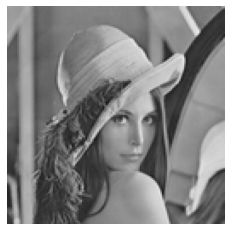

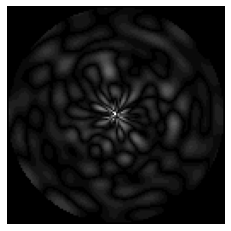

In [7]:
print(PSNR(im.im, E.im))
E.show()
imdiff = np.abs(im.im.astype('float16') - E.im.astype('float16')).astype('uint16')
II = Image(10*imdiff, colored=False)
II.show()

In [8]:
%%time
w2 = RHFM.decode(E, pos=len(w))
print(np.sum(np.abs(w - np.array(w2))))

0
CPU times: user 404 ms, sys: 0 ns, total: 404 ms
Wall time: 376 ms


In [9]:
RHFM.unloadVfile()

## ZM

In [10]:
%%time
N = 128
order = 50
im = Image('images/monochrome/lena_'+str(N)+'.png', colored=False)
ZM = ZernikeMoment(order, N, Vfile='V_ZM_'+str(N)+'.h5')

CPU times: user 522 ms, sys: 467 ms, total: 989 ms
Wall time: 3.56 s


In [11]:
%%time
E = ZM.encode(im, w, verbose=True)

CPU times: user 6.96 s, sys: 18.8 ms, total: 6.98 s
Wall time: 6.8 s


In [12]:
a=0
for i in range(1,17):
    for j in range(i//2):
        a += (i+1)**(-1)
255*((10**(40/10)*np.pi/24*a)**(-0.5))

2.853506815498896

40.25632513142539


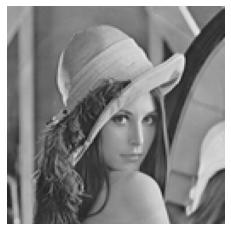

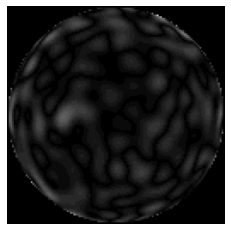

In [13]:
print(PSNR(im.im, E.im))
E.show()
imdiff = np.abs(im.im.astype('float16') - E.im.astype('float16')).astype('uint16')
II = Image(10*imdiff, colored=False)
II.show()

In [14]:
%%time
w2 = ZM.decode(E, pos=len(w))
print(np.sum(np.abs(w - np.array(w2))))

0
CPU times: user 57.7 ms, sys: 377 µs, total: 58 ms
Wall time: 57 ms


In [15]:
ZM.unloadVfile()

## PZM

In [16]:
%%time
N = 128
order = 50
im = Image('images/monochrome/lena_'+str(N)+'.png', colored=False)
PZM = PseudoZernikeMoment(order, N, Vfile='V_PZM_'+str(N)+'.h5')

CPU times: user 493 ms, sys: 520 ms, total: 1.01 s
Wall time: 3.74 s


In [17]:
%%time
E = PZM.encode(im, w, verbose=True)

CPU times: user 6.5 s, sys: 176 ms, total: 6.67 s
Wall time: 6.49 s


40.23187526356884


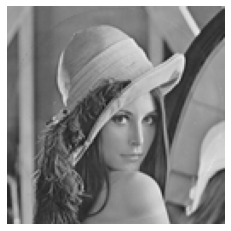

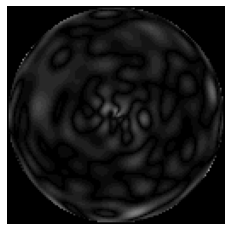

In [18]:
print(PSNR(im.im, E.im))
E.show()
imdiff = np.abs(im.im.astype('float16') - E.im.astype('float16')).astype('uint16')
II = Image(10*imdiff, colored=False)
II.show()

In [19]:
%%time
w2 = PZM.decode(E, pos=len(w))
print(np.sum(np.abs(w - np.array(w2))))

0
CPU times: user 31.6 ms, sys: 9.63 ms, total: 41.2 ms
Wall time: 39.8 ms


In [20]:
PZM.unloadVfile()